In [175]:
import warnings
warnings.filterwarnings("ignore")

# Data science & Python & Machine Learning

### Обработка данных

In [120]:
import pandas as pd

### DataFrame

- Основной объект, двумерная таблица
- Каждый столбец имеет тип данных и является `Series`

In [121]:
pd.DataFrame([{'a': 1, 'b': 2}, {'a': 3, 'b': 4}])

,a,b
0,1,2
1,3,4


### Series

- Одномерный ряд
- Имеет тип данных

In [122]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

### Чтение файлов

- http://pandas.pydata.org/pandas-docs/stable/io.html
- Функции `read_{format}`

In [123]:
df = pd.read_csv('titanic.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Запись файлов

- http://pandas.pydata.org/pandas-docs/stable/io.html
- Методы `to_{format}`

In [124]:
df.to_excel('titanic.xlsx')
pd.read_excel('titanic.xlsx').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Работа с SQL

- read_sql/to_sql для любого connection string
- Иногда нужны драйверы

In [126]:
df.to_sql('Titanic', 'sqlite:///db.sqlite', if_exists='replace')
pd.read_sql('SELECT * FROM Titanic WHERE Age > 22.0', 'sqlite:///db.sqlite').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
4,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### Выбор столбца

`DataFrame` ведет себя как словарь

In [128]:
df['Name'].head()
df.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

### Выбор столбцов

`DataFrame` ведет себя как "мульти"-словарь

In [129]:
df[['Name', 'Age']].head()

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0


### Выбор строк

`DataFrame` ведет себя как список

In [131]:
df[1:3].head()
df[::-1].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S


### Численная индексация через iloc

In [132]:
df.iloc[list(range(1,3)) + list(range(5, 7)), 4:6]

,Age,SibSp
PassengerId,,
2,38.0,1
3,26.0,0
6,NaN,0
7,54.0,0


### Индексы

У любого `DataFrame` есть ключевые столбцы

In [133]:
df.set_index(keys='Name').head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Braund, Mr. Owen Harris",0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",0,3,male,35.0,0,0,373450,8.0500,NaN,S


### Поиск по ключу через loc

In [134]:
df.set_index(keys='Name').loc[['Allen, Mr. William Henry', 'Braund, Mr. Owen Harris']]

# SELECT * FROM Titanic WHERE NAME IN (...)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Allen, Mr. William Henry",0,3,male,35.0,0,0,373450,8.05,NaN,S
"Braund, Mr. Owen Harris",0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S


### Фильтрация

`DataFrame` принимает на вход любую булевую маску

In [135]:
df[(df['Sex'] == 'female') | (df['Age'] > 30)].head()

# SELECT * FROM Titanic WHERE Sex == 'female' OR Age > 30

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### Преобразование столбцов

In [136]:
def predict_sex(name):
    if 'Mr' in name or 'Master' in name or 'Rev' in name:
        return 'Male'
    if 'Ms' in name or 'Mrs' in name or 'Miss' in name:
        return 'Female'
    return 'Unknown'

df['Name'].map(predict_sex).head()

PassengerId
1      Male
2      Male
3    Female
4      Male
5      Male
Name: Name, dtype: object

### Добавление новых столбцов

In [138]:
df['SexPredicted'] = df['Name'].map(predict_sex)

### Операции над строками

`apply` позволяет применять функцию ко всем строкам или столбцам (в зависимости от `axis`):

In [140]:
def compare(row):
    return row['Sex'] == row['SexPredicted'].lower()
compare = lambda row: row['Sex'] == row['SexPredicted'].lower()

df[['SexPredicted', 'Sex']].apply(compare, axis=1).mean()

0.83613916947250277

### Другие операции

In [142]:
df = df.rename(columns={'SexPredicted': 'PredictedSex'})
df = df.drop(columns=['Cabin'], errors='ignore')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PredictedSex
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Male
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Male
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Male


### Агрегация

In [144]:
c = df.groupby(['Sex']).Survived.agg(['mean', 'size', 'sum'])
c['mean_global'] = c['sum'] / c['sum'].sum()
c

,mean,size,sum,mean_global
Sex,,,,
female,0.742038,314,233,0.681287
male,0.188908,577,109,0.318713


### Сложная агрегация

In [145]:
def rate(group):
    # any code
    return group.sum() / group.count()

df.groupby(['Sex']).agg({
    'Age': {'min', 'max'}, 
    'Survived': {'mean', 'sum', 'count', rate}
})

Age        Survived                     
         max   min      rate      mean count  sum
Sex                                              
female  63.0  0.75  0.742038  0.742038   314  233
male    80.0  0.42  0.188908  0.188908   577  109

### Группировка численных значений

- `pd.cut` группировка по диапазону
- `pd.qcut` группировка по квантилям

In [146]:
df['AgeCategory'] = pd.qcut(df.Age, q=5)
df.groupby(['AgeCategory', 'Sex']).Survived.mean().unstack()

Sex,female,male
AgeCategory,,
"(0.419, 19.0]",0.706667,0.292135
"(19.0, 25.0]",0.723404,0.122222
"(25.0, 31.8]",0.727273,0.216867
"(31.8, 41.0]",0.843137,0.215054
"(41.0, 80.0]",0.795455,0.183673


### Matplotlib

Основная библиотека для графиков

- Много примеров: https://matplotlib.org/gallery/index.html

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
import numpy as np


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn).astype(np.float32)
    Y = np.linspace(ymin, ymax, yn).astype(np.float32)
    C = X + Y[:, None] * 1j
    N = np.zeros_like(C, dtype=int)
    Z = np.zeros_like(C)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N

def plot_mandelbrot():
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.25, +0.75, 3000/2
    ymin, ymax, yn = -1.25, +1.25, 2500/2
    maxiter = 200
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # Normalized recount as explained in:
    # https://linas.org/art-gallery/escape/smooth.html
    # https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift

    # This line will generate warnings for null values but it is faster to
    # process them afterwards using the nan_to_num
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 -
                          np.log(np.log(abs(Z)))/np.log(2) +
                          log_horizon)

    dpi = 36
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    # Some advertisement for matplotlib
    year = time.strftime("%Y")
    major, minor, micro = matplotlib.__version__.split('.', 2)
    text = ("The Mandelbrot fractal set\n"
            "Rendered with matplotlib %s.%s, %s - http://matplotlib.org"
            % (major, minor, year))
    ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()

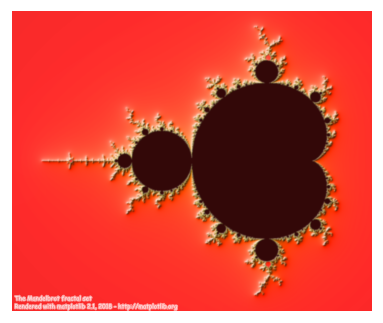

In [149]:
plot_mandelbrot()

### Pandas + Matplotlib

- https://pandas.pydata.org/pandas-docs/stable/visualization.html

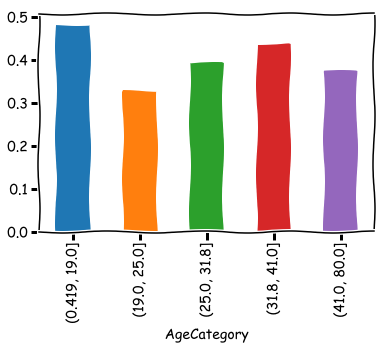

In [150]:
plt.xkcd()
df.groupby(['AgeCategory'])['Survived'].mean().plot.bar()
plt.savefig('figure.pdf')

### Seaborn

Удобная библиотека поверх matplotlib 

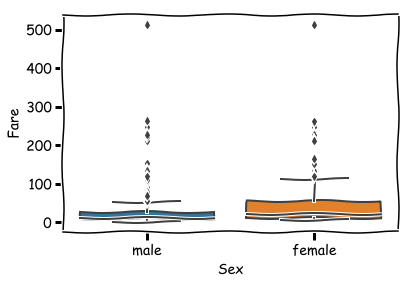

In [151]:
import seaborn as sns

sns.boxplot(x='Sex', y='Fare', data=df);

### Plotly

Библиотека для интерактивных графиков

- Не полностью открытая
- Примеры здесь: https://plot.ly/python/ipython-notebook-tutorial/
- Требует аккаунта в https://plot.ly